#  Financial Insights Dashboard and Scoring Model

## Data Analysis:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\91950\Desktop\family_financial_and_transactions_data.csv")
data

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
0,FAM001,FAM001_Member1,07-10-2024,Travel,409.12,113810,20234,5781,2422,2959,2,68
1,FAM001,FAM001_Member1,16-10-2024,Travel,270.91,113810,20234,5781,2422,2959,2,68
2,FAM001,FAM001_Member1,17-10-2024,Groceries,91.10,113810,20234,5781,2422,2959,2,68
3,FAM001,FAM001_Member1,25-10-2024,Healthcare,198.23,113810,20234,5781,2422,2959,2,68
4,FAM001,FAM001_Member1,25-10-2024,Education,206.42,113810,20234,5781,2422,2959,2,68
...,...,...,...,...,...,...,...,...,...,...,...,...
16301,FAM200,FAM200_Member6,10-10-2024,Groceries,79.99,44621,44081,4296,2470,2831,4,92
16302,FAM200,FAM200_Member6,22-10-2024,Education,228.39,44621,44081,4296,2470,2831,4,92
16303,FAM200,FAM200_Member6,29-10-2024,Travel,258.63,44621,44081,4296,2470,2831,4,92
16304,FAM200,FAM200_Member6,26-10-2024,Travel,467.46,44621,44081,4296,2470,2831,4,92


In [3]:
data.describe()

,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
count,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000
mean,256.368534,90340.503925,24473.998038,3948.522384,2529.978965,1782.880535,3.201521,59.418006
std,141.153813,34740.834136,14828.955695,1689.987801,1384.105561,716.595101,1.468880,23.444304
min,10.030000,30851.000000,1037.000000,1013.000000,3.000000,510.000000,0.000000,21.000000
25%,134.820000,59871.000000,11016.000000,2582.000000,1390.000000,1221.000000,2.000000,37.000000
50%,256.055000,90142.000000,25504.000000,3721.000000,2548.000000,1705.000000,3.000000,58.000000
75%,379.240000,119733.000000,37422.000000,5450.000000,3724.000000,2422.000000,4.000000,79.000000
max,499.910000,149871.000000,49217.000000,6968.000000,4974.000000,2999.000000,5.000000,100.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16306 entries, 0 to 16305
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Family ID                16306 non-null  object 
 1   Member ID                16306 non-null  object 
 2   Transaction Date         16306 non-null  object 
 3   Category                 16306 non-null  object 
 4   Amount                   16306 non-null  float64
 5   Income                   16306 non-null  int64  
 6   Savings                  16306 non-null  int64  
 7   Monthly Expenses         16306 non-null  int64  
 8   Loan Payments            16306 non-null  int64  
 9   Credit Card Spending     16306 non-null  int64  
 10  Dependents               16306 non-null  int64  
 11  Financial Goals Met (%)  16306 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 1.5+ MB


In [5]:
data.head()

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
0,FAM001,FAM001_Member1,07-10-2024,Travel,409.12,113810,20234,5781,2422,2959,2,68
1,FAM001,FAM001_Member1,16-10-2024,Travel,270.91,113810,20234,5781,2422,2959,2,68
2,FAM001,FAM001_Member1,17-10-2024,Groceries,91.10,113810,20234,5781,2422,2959,2,68
3,FAM001,FAM001_Member1,25-10-2024,Healthcare,198.23,113810,20234,5781,2422,2959,2,68
4,FAM001,FAM001_Member1,25-10-2024,Education,206.42,113810,20234,5781,2422,2959,2,68


In [6]:
data.isna()

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
16301,False,False,False,False,False,False,False,False,False,False,False,False
16302,False,False,False,False,False,False,False,False,False,False,False,False
16303,False,False,False,False,False,False,False,False,False,False,False,False
16304,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
data.isna().sum()

Family ID                  0
Member ID                  0
Transaction Date           0
Category                   0
Amount                     0
Income                     0
Savings                    0
Monthly Expenses           0
Loan Payments              0
Credit Card Spending       0
Dependents                 0
Financial Goals Met (%)    0
dtype: int64

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.shape

(16306, 12)

In [10]:
# Calculate total expenses
data['Total Expenses'] = data['Savings'] + data['Monthly Expenses'] + data['Loan Payments'] + data['Credit Card Spending']

# Calculate balance
data['Balance'] = data['Income'] - data['Total Expenses']

# Analyze discrepancies
print(data[['Member ID', 'Income', 'Total Expenses', 'Balance']])


            Member ID  Income  Total Expenses  Balance
0      FAM001_Member1  113810           31396    82414
1      FAM001_Member1  113810           31396    82414
2      FAM001_Member1  113810           31396    82414
3      FAM001_Member1  113810           31396    82414
4      FAM001_Member1  113810           31396    82414
...               ...     ...             ...      ...
16301  FAM200_Member6   44621           53678    -9057
16302  FAM200_Member6   44621           53678    -9057
16303  FAM200_Member6   44621           53678    -9057
16304  FAM200_Member6   44621           53678    -9057
16305  FAM200_Member6   44621           53678    -9057

[16306 rows x 4 columns]


In [11]:
data.head()

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%),Total Expenses,Balance
0,FAM001,FAM001_Member1,07-10-2024,Travel,409.12,113810,20234,5781,2422,2959,2,68,31396,82414
1,FAM001,FAM001_Member1,16-10-2024,Travel,270.91,113810,20234,5781,2422,2959,2,68,31396,82414
2,FAM001,FAM001_Member1,17-10-2024,Groceries,91.10,113810,20234,5781,2422,2959,2,68,31396,82414
3,FAM001,FAM001_Member1,25-10-2024,Healthcare,198.23,113810,20234,5781,2422,2959,2,68,31396,82414
4,FAM001,FAM001_Member1,25-10-2024,Education,206.42,113810,20234,5781,2422,2959,2,68,31396,82414


In [12]:
essential_categories = ["Groceries","Healthcare","Education","Utilities","Food"]
no_essential_categories = ["Travel","Entertainment"]

In [13]:
data['is_essential'] = data.apply(lambda row: row['Amount'] if row['Category'] in essential_categories else 0, axis=1)
data['is_non_essential'] = data.apply(lambda row: row['Amount'] if row['Category'] in no_essential_categories else 0, axis=1)

In [14]:
data.head()

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%),Total Expenses,Balance,is_essential,is_non_essential
0,FAM001,FAM001_Member1,07-10-2024,Travel,409.12,113810,20234,5781,2422,2959,2,68,31396,82414,0.00,409.12
1,FAM001,FAM001_Member1,16-10-2024,Travel,270.91,113810,20234,5781,2422,2959,2,68,31396,82414,0.00,270.91
2,FAM001,FAM001_Member1,17-10-2024,Groceries,91.10,113810,20234,5781,2422,2959,2,68,31396,82414,91.10,0.00
3,FAM001,FAM001_Member1,25-10-2024,Healthcare,198.23,113810,20234,5781,2422,2959,2,68,31396,82414,198.23,0.00
4,FAM001,FAM001_Member1,25-10-2024,Education,206.42,113810,20234,5781,2422,2959,2,68,31396,82414,206.42,0.00


In [15]:
summarized_data = (
    data.groupby(['Family ID', 'Member ID'], as_index=False)
    .agg({
        'Amount': 'sum',  
        "is_essential": "sum",
        "is_non_essential" : "sum",
        'Income': 'first',                
        'Savings': 'first',
        'Monthly Expenses': 'first',
        'Loan Payments': 'first',
        'Credit Card Spending': 'first',
        'Dependents': 'first',
        'Financial Goals Met (%)': 'first'
    })
)
summarized_data.head()


,Family ID,Member ID,Amount,is_essential,is_non_essential,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
0,FAM001,FAM001_Member1,6521.20,3936.25,2584.95,113810,20234,5781,2422,2959,2,68
1,FAM001,FAM001_Member2,7084.83,5030.99,2053.84,113810,20234,5781,2422,2959,2,68
2,FAM001,FAM001_Member3,2119.41,1417.43,701.98,113810,20234,5781,2422,2959,2,68
3,FAM001,FAM001_Member4,7463.46,4058.56,3404.90,113810,20234,5781,2422,2959,2,68
4,FAM002,FAM002_Member1,3082.90,2539.54,543.36,44592,29492,5630,4541,995,3,60


In [16]:

summarized_data['Total Expenses'] = summarized_data['Amount'] + summarized_data['Monthly Expenses'] + summarized_data['Loan Payments'] + summarized_data['Credit Card Spending']


In [17]:
summarized_data["unexplained_amount"] = summarized_data["Income"] - summarized_data["Savings"] - summarized_data["Total Expenses"]

In [18]:
summarized_data.head(10)

,Family ID,Member ID,Amount,is_essential,is_non_essential,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%),Total Expenses,unexplained_amount
0,FAM001,FAM001_Member1,6521.20,3936.25,2584.95,113810,20234,5781,2422,2959,2,68,17683.20,75892.80
1,FAM001,FAM001_Member2,7084.83,5030.99,2053.84,113810,20234,5781,2422,2959,2,68,18246.83,75329.17
2,FAM001,FAM001_Member3,2119.41,1417.43,701.98,113810,20234,5781,2422,2959,2,68,13281.41,80294.59
3,FAM001,FAM001_Member4,7463.46,4058.56,3404.90,113810,20234,5781,2422,2959,2,68,18625.46,74950.54
4,FAM002,FAM002_Member1,3082.90,2539.54,543.36,44592,29492,5630,4541,995,3,60,14248.90,851.10
5,FAM002,FAM002_Member2,3702.42,3219.61,482.81,44592,29492,5630,4541,995,3,60,14868.42,231.58
6,FAM002,FAM002_Member3,6340.10,3187.09,3153.01,44592,29492,5630,4541,995,3,60,17506.10,-2406.10
7,FAM002,FAM002_Member4,3018.51,2430.62,587.89,44592,29492,5630,4541,995,3,60,14184.51,915.49
8,FAM002,FAM002_Member5,6165.78,5214.34,951.44,44592,29492,5630,4541,995,3,60,17331.78,-2231.78
9,FAM003,FAM003_Member1,5006.55,4058.65,947.90,33278,11365,5282,1042,2818,0,100,14148.55,7764.45


In [19]:
summarized_data["Flag High Unexplained"] = (
    summarized_data["unexplained_amount"] / summarized_data["Income"]
) > 0.2


In [20]:
summarized_data


,Family ID,Member ID,Amount,is_essential,is_non_essential,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%),Total Expenses,unexplained_amount,Flag High Unexplained
0,FAM001,FAM001_Member1,6521.20,3936.25,2584.95,113810,20234,5781,2422,2959,2,68,17683.20,75892.80,True
1,FAM001,FAM001_Member2,7084.83,5030.99,2053.84,113810,20234,5781,2422,2959,2,68,18246.83,75329.17,True
2,FAM001,FAM001_Member3,2119.41,1417.43,701.98,113810,20234,5781,2422,2959,2,68,13281.41,80294.59,True
3,FAM001,FAM001_Member4,7463.46,4058.56,3404.90,113810,20234,5781,2422,2959,2,68,18625.46,74950.54,True
4,FAM002,FAM002_Member1,3082.90,2539.54,543.36,44592,29492,5630,4541,995,3,60,14248.90,851.10,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,FAM200,FAM200_Member2,2103.85,1796.25,307.60,44621,44081,4296,2470,2831,4,92,11700.85,-11160.85,False
922,FAM200,FAM200_Member3,4671.33,3733.44,937.89,44621,44081,4296,2470,2831,4,92,14268.33,-13728.33,False
923,FAM200,FAM200_Member4,3739.52,2495.60,1243.92,44621,44081,4296,2470,2831,4,92,13336.52,-12796.52,False
924,FAM200,FAM200_Member5,5408.28,2598.26,2810.02,44621,44081,4296,2470,2831,4,92,15005.28,-14465.28,False


In [21]:
summarized_data["Flag High Unexplained"].value_counts()

Flag High Unexplained
True     784
False    142
Name: count, dtype: int64

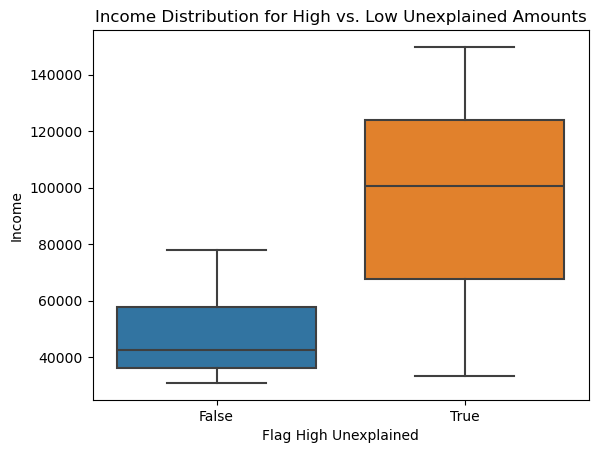

In [22]:
sns.boxplot(data=summarized_data, x="Flag High Unexplained", y="Income")
plt.title("Income Distribution for High vs. Low Unexplained Amounts")
plt.show()


In [23]:
summarized_data["Unexplained %"] = (
    summarized_data["unexplained_amount"] / summarized_data["Income"]
) * 100


In [24]:
summarized_data.head()

,Family ID,Member ID,Amount,is_essential,is_non_essential,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%),Total Expenses,unexplained_amount,Flag High Unexplained,Unexplained %
0,FAM001,FAM001_Member1,6521.20,3936.25,2584.95,113810,20234,5781,2422,2959,2,68,17683.20,75892.80,True,66.683771
1,FAM001,FAM001_Member2,7084.83,5030.99,2053.84,113810,20234,5781,2422,2959,2,68,18246.83,75329.17,True,66.188534
2,FAM001,FAM001_Member3,2119.41,1417.43,701.98,113810,20234,5781,2422,2959,2,68,13281.41,80294.59,True,70.551437
3,FAM001,FAM001_Member4,7463.46,4058.56,3404.90,113810,20234,5781,2422,2959,2,68,18625.46,74950.54,True,65.855847
4,FAM002,FAM002_Member1,3082.90,2539.54,543.36,44592,29492,5630,4541,995,3,60,14248.90,851.10,False,1.908638


In [25]:
# Logic to adjust the income based on unexplained_amount
summarized_data['Adjusted Income'] = summarized_data['Income'] - summarized_data['unexplained_amount']

# Check if the unexplained amount is positive or negative and adjust accordingly
summarized_data['Adjusted Income'] = summarized_data.apply(
    lambda row: row['Income'] - row['unexplained_amount'] if row['unexplained_amount'] > 0 else row['Income'] + abs(row['unexplained_amount']),
    axis=1
)




In [26]:
summarized_data.head()

,Family ID,Member ID,Amount,is_essential,is_non_essential,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%),Total Expenses,unexplained_amount,Flag High Unexplained,Unexplained %,Adjusted Income
0,FAM001,FAM001_Member1,6521.20,3936.25,2584.95,113810,20234,5781,2422,2959,2,68,17683.20,75892.80,True,66.683771,37917.20
1,FAM001,FAM001_Member2,7084.83,5030.99,2053.84,113810,20234,5781,2422,2959,2,68,18246.83,75329.17,True,66.188534,38480.83
2,FAM001,FAM001_Member3,2119.41,1417.43,701.98,113810,20234,5781,2422,2959,2,68,13281.41,80294.59,True,70.551437,33515.41
3,FAM001,FAM001_Member4,7463.46,4058.56,3404.90,113810,20234,5781,2422,2959,2,68,18625.46,74950.54,True,65.855847,38859.46
4,FAM002,FAM002_Member1,3082.90,2539.54,543.36,44592,29492,5630,4541,995,3,60,14248.90,851.10,False,1.908638,43740.90


## Building a Financial Model

In [27]:
# Saving to income ration
Saving_to_income_ratio = summarized_data["Savings"]/summarized_data["Adjusted Income"]
Saving_to_income_ratio

0      0.533636
1      0.525820
2      0.603722
3      0.520697
4      0.674243
         ...   
921    0.790239
922    0.755467
923    0.767727
924    0.746045
925    0.794027
Length: 926, dtype: float64

In [28]:
#Monthly expenses as the percentage of income

Monthly_expenses_percentage = (summarized_data["Total Expenses"]/summarized_data["Adjusted Income"])*100
Monthly_expenses_percentage

0      46.636355
1      47.417974
2      39.627771
3      47.930311
4      32.575690
         ...    
921    20.976088
922    24.453288
923    23.227266
924    25.395540
925    20.597279
Length: 926, dtype: float64

In [29]:
#loan payment as a percentage of income
loan_payment_percentage = (summarized_data["Loan Payments"]/summarized_data["Adjusted Income"])*100
loan_payment_percentage

0       6.387602
1       6.294043
2       7.226527
3       6.232717
4      10.381588
         ...    
921     4.427964
922     4.233125
923     4.301823
924     4.180327
925     4.449189
Length: 926, dtype: float64

In [30]:
# Credit card spending trends of Adjusted income
credit_card_spending_percentage = (summarized_data["Credit Card Spending"]/summarized_data["Adjusted Income"])*100
credit_card_spending_percentage

0      7.803846
1      7.689543
2      8.828775
3      7.614619
4      2.274759
         ...   
921    5.075127
922    4.851812
923    4.930551
924    4.791298
925    5.099456
Length: 926, dtype: float64

In [31]:
weights = {
    "savings_to_income": 20,
    "expenses_to_income": 20,
    "loan_to_income": 15,
    "credit_card_spending": 15,
    "spending_distribution": 10,
    "financial_goals": 20
}
summarized_data["savings_to_income"] = (summarized_data["Savings"] / summarized_data["Adjusted Income"]) * 100
summarized_data["expenses_to_income"] = (summarized_data["Monthly Expenses"] / summarized_data["Adjusted Income"]) * 100
summarized_data["loan_to_income"] = (summarized_data["Loan Payments"] / summarized_data["Adjusted Income"]) * 100
summarized_data["credit_card_spending"] = (summarized_data["Credit Card Spending"] / summarized_data["Adjusted Income"]) * 100
summarized_data["financial_goals"] = summarized_data["Financial Goals Met (%)"]
summarized_data["spending_distribution"] = (summarized_data["Amount"] / summarized_data["Total Expenses"]) * 100
summarized_data["final_score"] = (
    weights["savings_to_income"] * (summarized_data["savings_to_income"] / 100) +
    weights["expenses_to_income"] * (100 - summarized_data["expenses_to_income"]) / 100 +  # Lower is better
    weights["loan_to_income"] * (100 - summarized_data["loan_to_income"]) / 100 +          # Lower is better
    weights["credit_card_spending"] * (100 - summarized_data["credit_card_spending"]) / 100 +  # Lower is better
    weights["spending_distribution"] * (100 - summarized_data["spending_distribution"]) / 100 +  # Lower is better
    weights["financial_goals"] * (summarized_data["financial_goals"] / 100)
)



In [32]:
summarized_data = summarized_data.drop("unexplained_amount",axis=1)
summarized_data = summarized_data.drop("Flag High Unexplained",axis=1)
summarized_data = summarized_data.drop("Unexplained %",axis=1)


In [33]:
summarized_data.head()

,Family ID,Member ID,Amount,is_essential,is_non_essential,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,...,Financial Goals Met (%),Total Expenses,Adjusted Income,savings_to_income,expenses_to_income,loan_to_income,credit_card_spending,financial_goals,spending_distribution,final_score
0,FAM001,FAM001_Member1,6521.20,3936.25,2584.95,113810,20234,5781,2422,2959,...,68,17683.20,37917.20,53.363645,15.246379,6.387602,7.803846,68,36.877941,75.406942
1,FAM001,FAM001_Member2,7084.83,5030.99,2053.84,113810,20234,5781,2422,2959,...,68,18246.83,38480.83,52.582026,15.023065,6.294043,7.689543,68,38.827731,75.131481
2,FAM001,FAM001_Member3,2119.41,1417.43,701.98,113810,20234,5781,2422,2959,...,68,13281.41,33515.41,60.372229,17.248782,7.226527,8.828775,68,15.957718,78.220622
3,FAM001,FAM001_Member4,7463.46,4058.56,3404.90,113810,20234,5781,2422,2959,...,68,18625.46,38859.46,52.069689,14.876686,6.232717,7.614619,68,40.071279,74.954372
4,FAM002,FAM002_Member1,3082.90,2539.54,543.36,44592,29492,5630,4541,995,...,60,14248.90,43740.90,67.424310,12.871249,10.381588,2.274759,60,21.636056,78.848555


In [34]:
summarized_data.head()

,Family ID,Member ID,Amount,is_essential,is_non_essential,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,...,Financial Goals Met (%),Total Expenses,Adjusted Income,savings_to_income,expenses_to_income,loan_to_income,credit_card_spending,financial_goals,spending_distribution,final_score
0,FAM001,FAM001_Member1,6521.20,3936.25,2584.95,113810,20234,5781,2422,2959,...,68,17683.20,37917.20,53.363645,15.246379,6.387602,7.803846,68,36.877941,75.406942
1,FAM001,FAM001_Member2,7084.83,5030.99,2053.84,113810,20234,5781,2422,2959,...,68,18246.83,38480.83,52.582026,15.023065,6.294043,7.689543,68,38.827731,75.131481
2,FAM001,FAM001_Member3,2119.41,1417.43,701.98,113810,20234,5781,2422,2959,...,68,13281.41,33515.41,60.372229,17.248782,7.226527,8.828775,68,15.957718,78.220622
3,FAM001,FAM001_Member4,7463.46,4058.56,3404.90,113810,20234,5781,2422,2959,...,68,18625.46,38859.46,52.069689,14.876686,6.232717,7.614619,68,40.071279,74.954372
4,FAM002,FAM002_Member1,3082.90,2539.54,543.36,44592,29492,5630,4541,995,...,60,14248.90,43740.90,67.424310,12.871249,10.381588,2.274759,60,21.636056,78.848555


In [35]:
summarized_data = summarized_data.drop("Income",axis=1)
summarized_data.head()

,Family ID,Member ID,Amount,is_essential,is_non_essential,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%),Total Expenses,Adjusted Income,savings_to_income,expenses_to_income,loan_to_income,credit_card_spending,financial_goals,spending_distribution,final_score
0,FAM001,FAM001_Member1,6521.20,3936.25,2584.95,20234,5781,2422,2959,2,68,17683.20,37917.20,53.363645,15.246379,6.387602,7.803846,68,36.877941,75.406942
1,FAM001,FAM001_Member2,7084.83,5030.99,2053.84,20234,5781,2422,2959,2,68,18246.83,38480.83,52.582026,15.023065,6.294043,7.689543,68,38.827731,75.131481
2,FAM001,FAM001_Member3,2119.41,1417.43,701.98,20234,5781,2422,2959,2,68,13281.41,33515.41,60.372229,17.248782,7.226527,8.828775,68,15.957718,78.220622
3,FAM001,FAM001_Member4,7463.46,4058.56,3404.90,20234,5781,2422,2959,2,68,18625.46,38859.46,52.069689,14.876686,6.232717,7.614619,68,40.071279,74.954372
4,FAM002,FAM002_Member1,3082.90,2539.54,543.36,29492,5630,4541,995,3,60,14248.90,43740.90,67.424310,12.871249,10.381588,2.274759,60,21.636056,78.848555


In [36]:
summarized_data.describe()

,Amount,is_essential,is_non_essential,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%),Total Expenses,Adjusted Income,savings_to_income,expenses_to_income,loan_to_income,credit_card_spending,financial_goals,spending_distribution,final_score
count,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000
mean,4514.411793,3216.292916,1298.118877,24361.976242,3959.789417,2554.409287,1802.158747,3.198704,59.344492,12830.769244,37192.745486,58.839694,12.748049,8.294592,5.811430,59.344492,34.694577,75.501867
std,1992.217165,1541.002630,778.451688,14754.342498,1708.111919,1398.661713,711.528167,1.465804,23.459018,2913.609296,14745.399848,19.969449,7.916372,6.254841,3.657610,23.459018,12.651677,7.643919
min,508.560000,92.780000,0.000000,1037.000000,1013.000000,3.000000,510.000000,0.000000,21.000000,5238.710000,9418.130000,5.926706,1.921279,0.014666,0.854235,21.000000,4.102759,53.679726
25%,2776.907500,1928.390000,715.452500,11144.000000,2582.000000,1390.000000,1255.000000,2.000000,37.000000,10795.082500,23899.597500,44.535997,6.689513,3.261888,3.355091,37.000000,25.385541,70.573648
50%,4543.615000,3186.140000,1190.150000,25130.000000,3716.500000,2577.000000,1744.000000,3.000000,58.000000,12738.225000,37097.820000,65.658571,10.856051,7.167206,5.101115,58.000000,35.150094,76.158262
75%,6152.652500,4460.057500,1794.532500,37301.000000,5519.000000,3739.000000,2424.000000,4.000000,78.000000,14918.830000,49997.727500,74.696459,17.268861,11.372321,7.237335,78.000000,44.095307,80.888325
max,9509.200000,7707.180000,4225.020000,49217.000000,6968.000000,4974.000000,2999.000000,5.000000,100.000000,20991.570000,65981.120000,90.318892,38.648838,32.904992,28.392048,100.000000,73.718500,92.202142


In [37]:
summarized_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Family ID                926 non-null    object 
 1   Member ID                926 non-null    object 
 2   Amount                   926 non-null    float64
 3   is_essential             926 non-null    float64
 4   is_non_essential         926 non-null    float64
 5   Savings                  926 non-null    int64  
 6   Monthly Expenses         926 non-null    int64  
 7   Loan Payments            926 non-null    int64  
 8   Credit Card Spending     926 non-null    int64  
 9   Dependents               926 non-null    int64  
 10  Financial Goals Met (%)  926 non-null    int64  
 11  Total Expenses           926 non-null    float64
 12  Adjusted Income          926 non-null    float64
 13  savings_to_income        926 non-null    float64
 14  expenses_to_income       9

# Building visualizations:

C:\Users\91950\Desktop\sample_project1\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


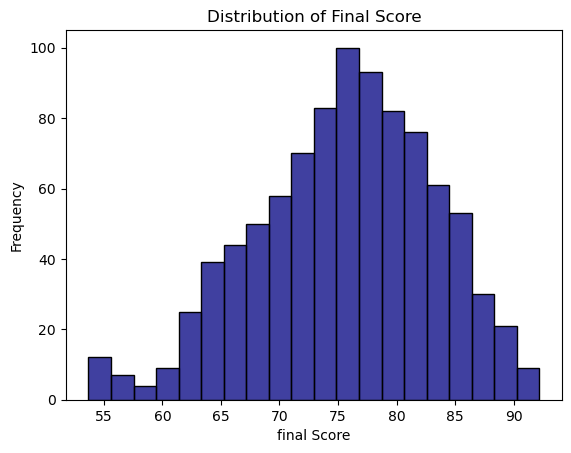

In [38]:
sns.histplot(summarized_data['final_score'],  bins=20, color='navy')
plt.title("Distribution of Final Score")
plt.xlabel("final Score")
plt.ylabel("Frequency")
plt.show()


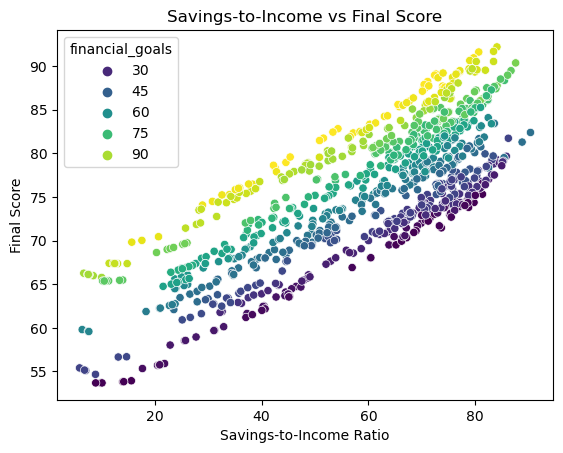

In [39]:
sns.scatterplot(x=summarized_data['savings_to_income'], y=summarized_data['final_score'], hue=summarized_data['financial_goals'], palette='viridis')
plt.title("Savings-to-Income vs Final Score")
plt.xlabel("Savings-to-Income Ratio")
plt.ylabel("Final Score")
plt.show()


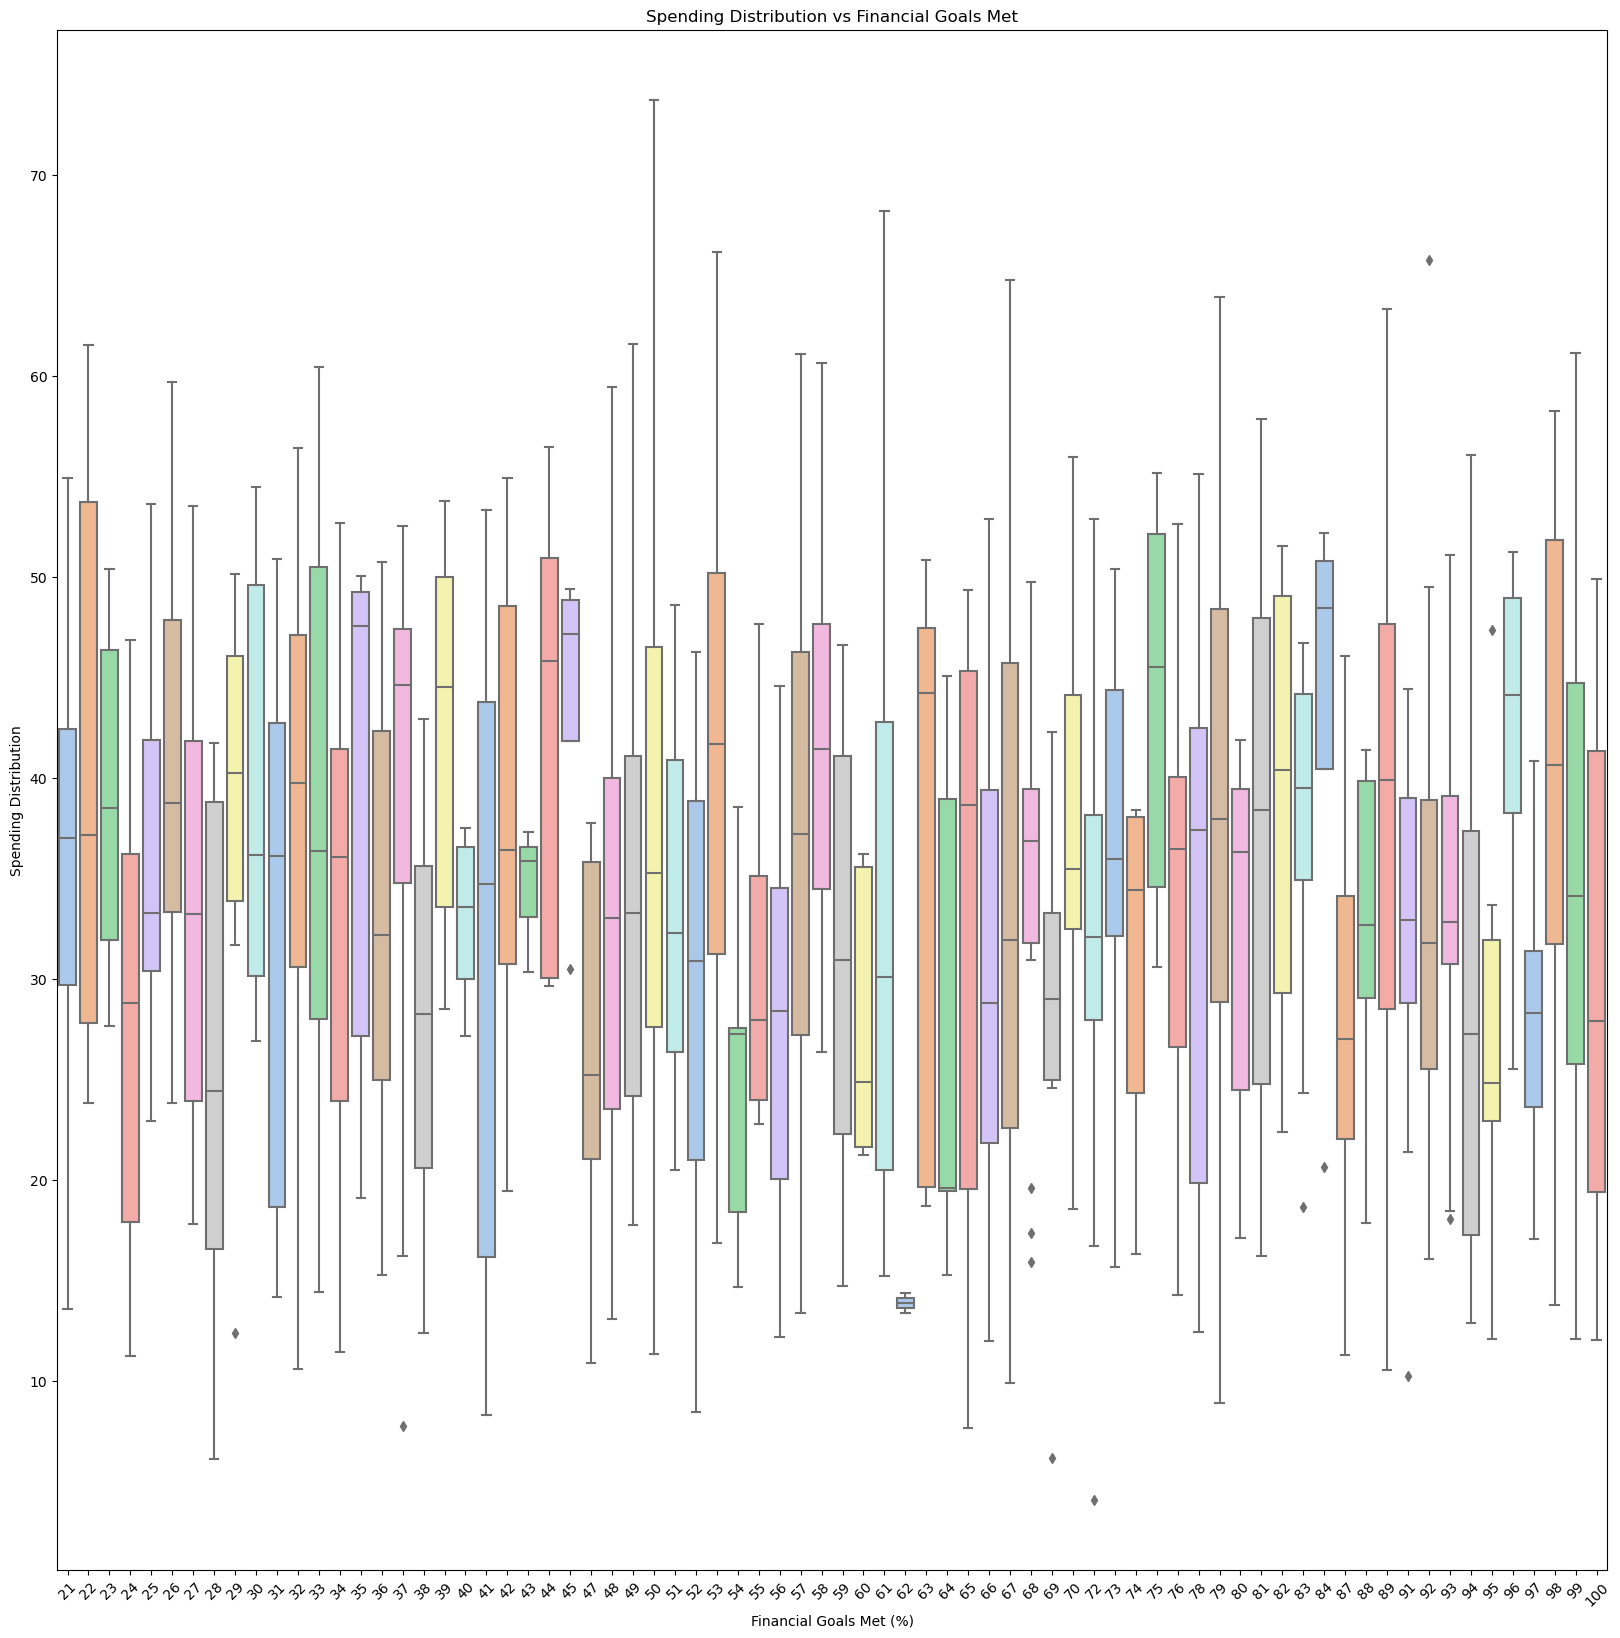

In [40]:
plt.figure(figsize = (20,20))
sns.boxplot(x=summarized_data['Financial Goals Met (%)'], y=summarized_data['spending_distribution'], palette='pastel')
plt.title("Spending Distribution vs Financial Goals Met")
plt.xlabel("Financial Goals Met (%)")
plt.ylabel("Spending Distribution")
plt.xticks(rotation=45)
plt.show()


In [41]:
correlation_matrix = summarized_data.corr(numeric_only = True)
correlation_matrix

,Amount,is_essential,is_non_essential,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%),Total Expenses,Adjusted Income,savings_to_income,expenses_to_income,loan_to_income,credit_card_spending,financial_goals,spending_distribution,final_score
Amount,1.000000,0.934464,0.709364,0.004118,-0.015912,-0.050297,-0.069237,0.004204,-0.000874,0.633381,0.129273,-0.164174,-0.119316,-0.111747,-0.161393,-0.000874,0.855358,-0.177875
is_essential,0.934464,1.000000,0.411911,0.006037,-0.009683,-0.061872,-0.046217,-0.001798,-0.015026,0.592287,0.123074,-0.152731,-0.108073,-0.111868,-0.142811,-0.015026,0.798911,-0.174888
is_non_essential,0.709364,0.411911,1.000000,-0.001413,-0.021554,-0.006240,-0.085702,0.014319,0.027510,0.448476,0.087202,-0.117812,-0.091415,-0.064533,-0.130335,0.027510,0.607534,-0.109015
Savings,0.004118,0.006037,-0.001413,1.000000,-0.092118,-0.116919,0.022559,-0.018581,-0.067216,-0.101806,0.980490,0.908338,-0.722606,-0.626288,-0.665384,-0.067216,0.053752,0.698747
Monthly Expenses,-0.015912,-0.009683,-0.021554,-0.092118,1.000000,-0.032997,-0.066893,0.047191,0.011417,0.543197,0.015159,-0.197661,0.642272,-0.041629,-0.082805,0.011417,-0.346192,-0.160949
Loan Payments,-0.050297,-0.061872,-0.006240,-0.116919,-0.032997,1.000000,0.022691,-0.025865,0.037801,0.431850,-0.031658,-0.213733,-0.014754,0.734330,0.038916,0.037801,-0.330113,-0.123704
Credit Card Spending,-0.069237,-0.046217,-0.085702,0.022559,-0.066893,0.022691,1.000000,-0.029381,0.003588,0.168543,0.055876,-0.023224,-0.085086,0.021474,0.551836,0.003588,-0.216228,0.001236
Dependents,0.004204,-0.001798,0.014319,-0.018581,0.047191,-0.025865,-0.029381,1.000000,-0.031546,0.010949,-0.016428,-0.069696,0.094244,0.046622,0.001520,-0.031546,-0.010168,-0.079447
Financial Goals Met (%),-0.000874,-0.015026,0.027510,-0.067216,0.011417,0.037801,0.003588,-0.031546,1.000000,0.025118,-0.062294,-0.057176,0.032945,0.085410,-0.010720,1.000000,-0.011588,0.569302
Total Expenses,0.633381,0.592287,0.448476,-0.101806,0.543197,0.431850,0.168543,0.010949,0.025118,1.000000,0.095727,-0.336408,0.267089,0.256941,-0.005455,0.025118,0.170632,-0.275063


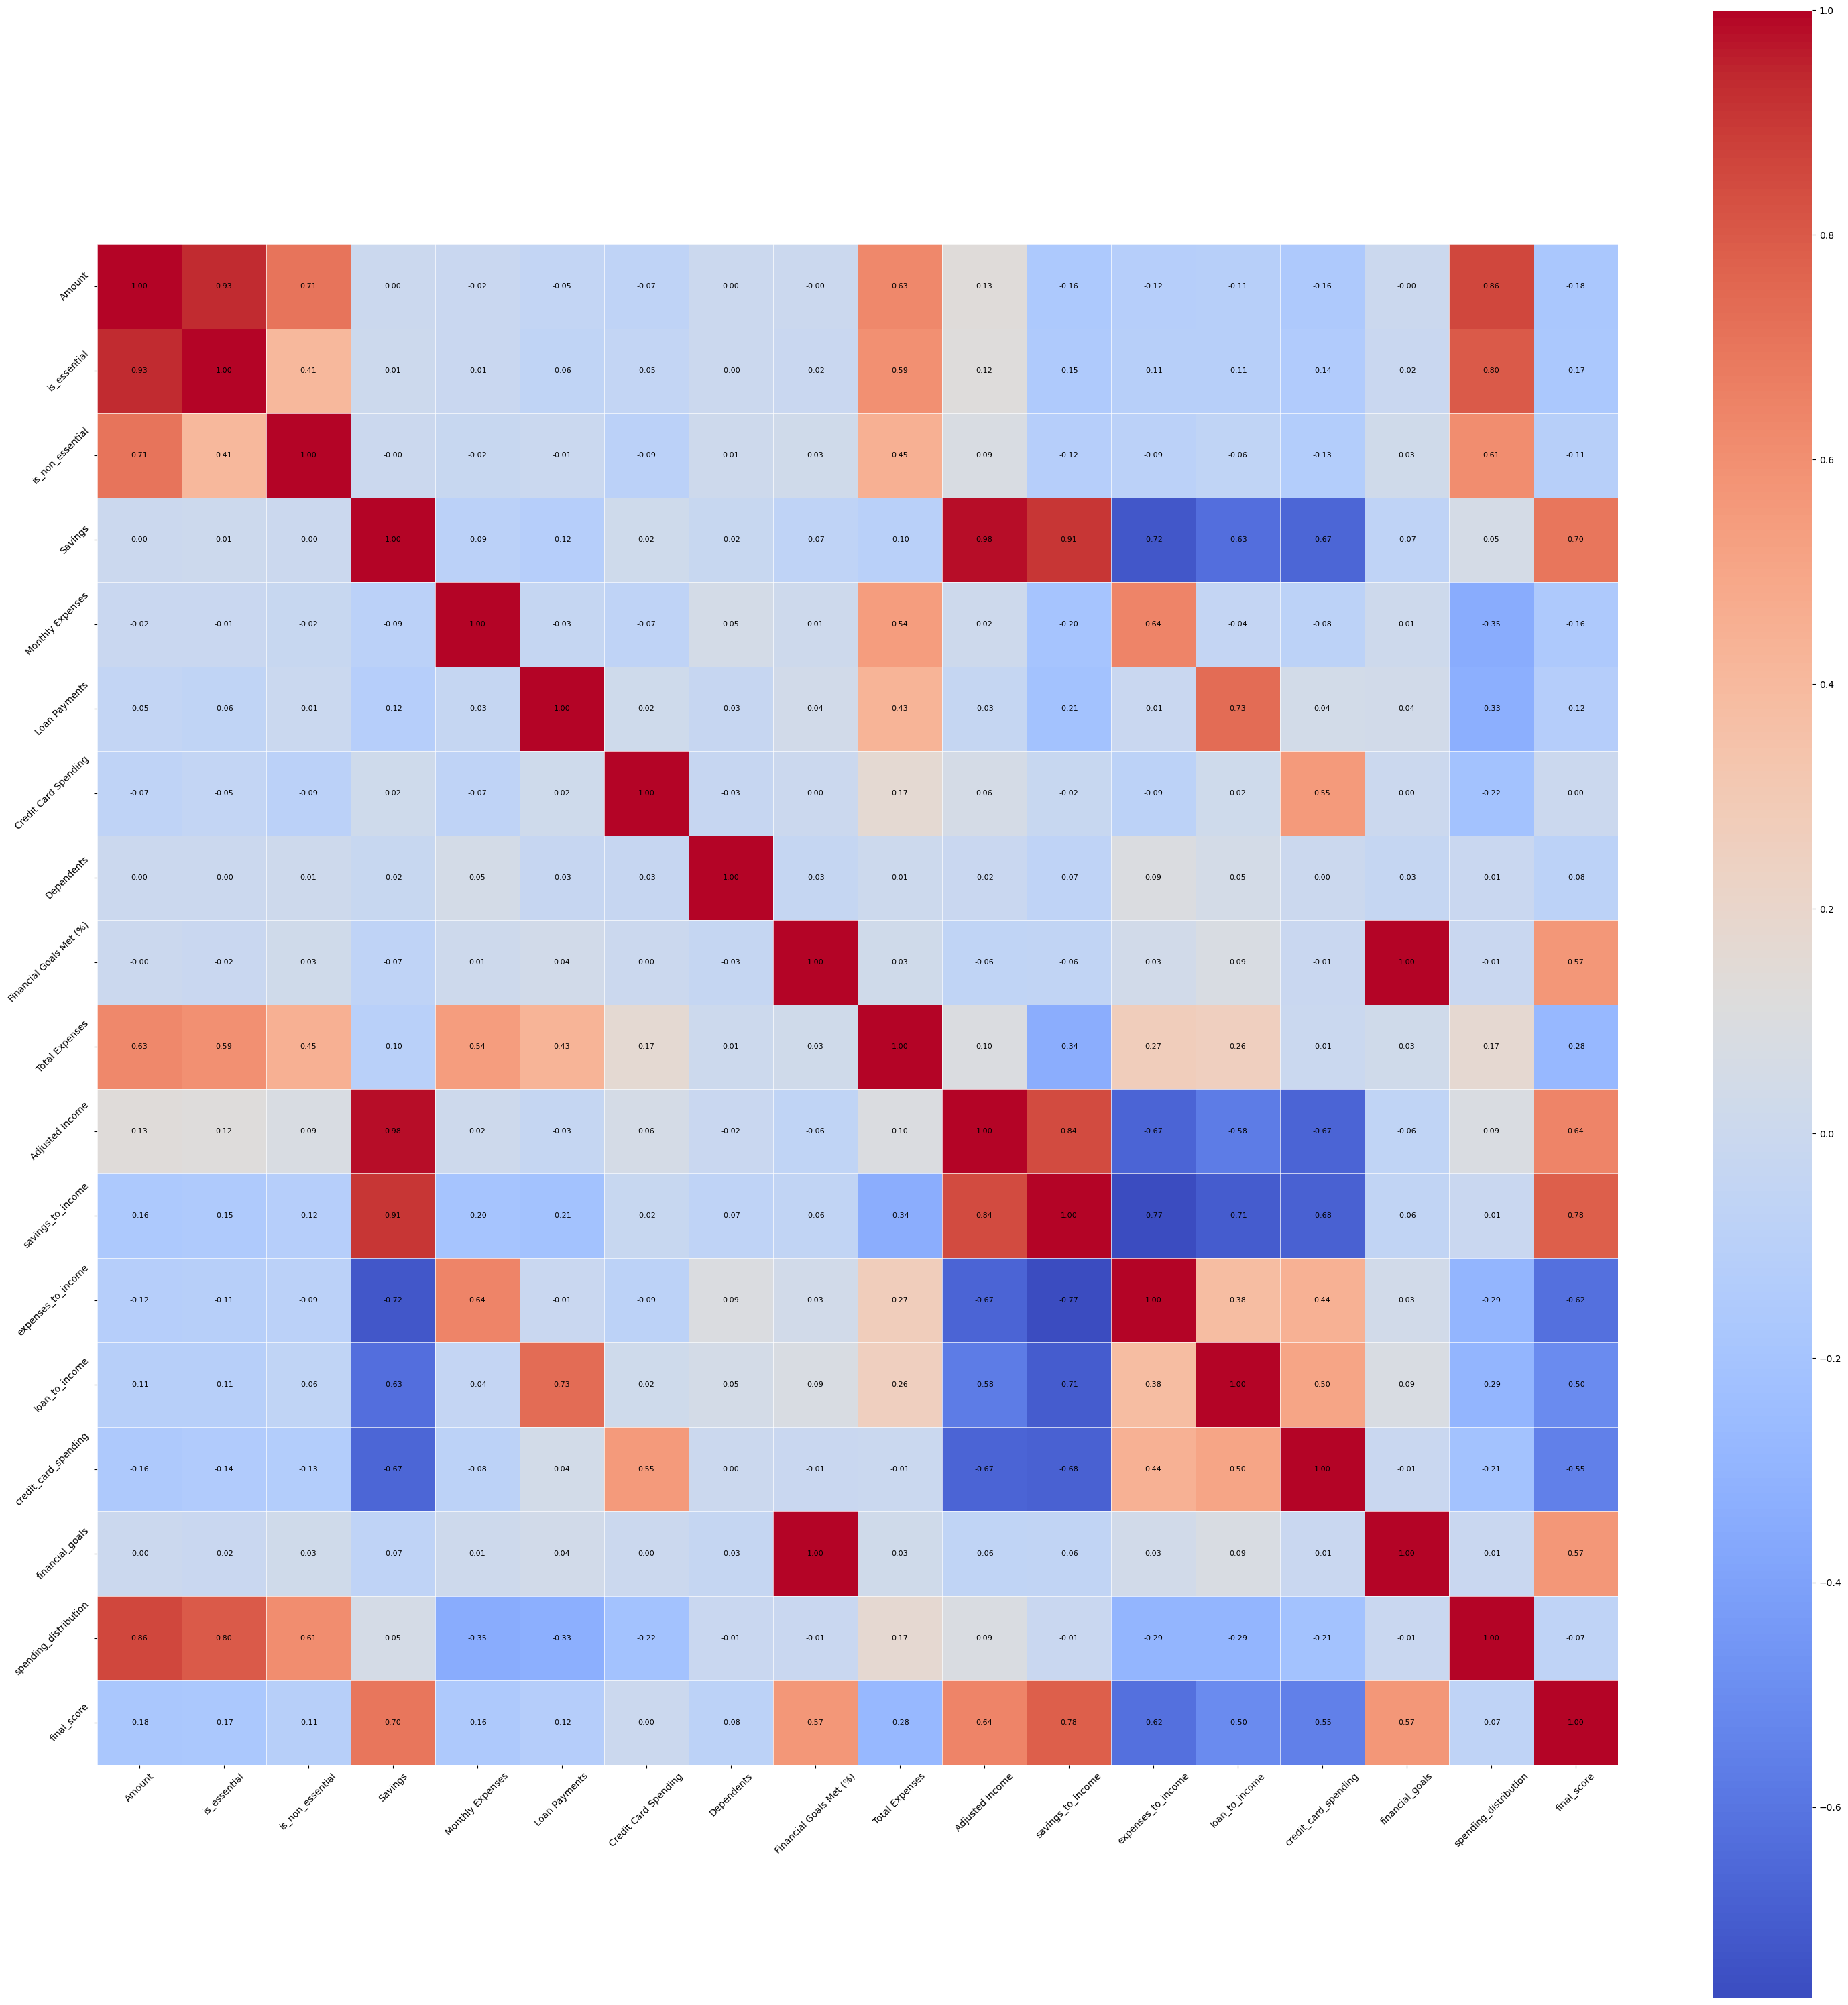

In [42]:
plt.figure(figsize=(30,30))
heat_map = sns.heatmap(correlation_matrix,cmap = "coolwarm",square = True)
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        text = f"{correlation_matrix.iloc[i,j]:.2f}"
        plt.text(j+0.5,i+0.5,text,ha = "center",va = "center",fontsize = 8)

plt.xticks(rotation=45)
plt.yticks(rotation =45)
for k in range(len(correlation_matrix+1)):
    plt.axhline(k,color="white",linewidth=0.5)
    plt.axvline(k,color="white",linewidth=0.5)
plt.tight_layout()

plt.show()


# Building model:


In [43]:
attributes = ["Amount","is_essential","is_non_essential","Savings","Monthly Expenses","Loan Payments","Financial Goals Met (%)","Total Expenses","Adjusted Income","savings_to_income","expenses_to_income","loan_to_income","credit_card_spending","financial_goals"]

In [44]:
x = summarized_data[attributes]
x

,Amount,is_essential,is_non_essential,Savings,Monthly Expenses,Loan Payments,Financial Goals Met (%),Total Expenses,Adjusted Income,savings_to_income,expenses_to_income,loan_to_income,credit_card_spending,financial_goals
0,6521.20,3936.25,2584.95,20234,5781,2422,68,17683.20,37917.20,53.363645,15.246379,6.387602,7.803846,68
1,7084.83,5030.99,2053.84,20234,5781,2422,68,18246.83,38480.83,52.582026,15.023065,6.294043,7.689543,68
2,2119.41,1417.43,701.98,20234,5781,2422,68,13281.41,33515.41,60.372229,17.248782,7.226527,8.828775,68
3,7463.46,4058.56,3404.90,20234,5781,2422,68,18625.46,38859.46,52.069689,14.876686,6.232717,7.614619,68
4,3082.90,2539.54,543.36,29492,5630,4541,60,14248.90,43740.90,67.424310,12.871249,10.381588,2.274759,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,2103.85,1796.25,307.60,44081,4296,2470,92,11700.85,55781.85,79.023912,7.701430,4.427964,5.075127,92
922,4671.33,3733.44,937.89,44081,4296,2470,92,14268.33,58349.33,75.546712,7.362552,4.233125,4.851812,92
923,3739.52,2495.60,1243.92,44081,4296,2470,92,13336.52,57417.52,76.772734,7.482037,4.301823,4.930551,92
924,5408.28,2598.26,2810.02,44081,4296,2470,92,15005.28,59086.28,74.604460,7.270723,4.180327,4.791298,92


In [45]:
y = summarized_data["final_score"]
y

0      75.406942
1      75.131481
2      78.220622
3      74.954372
4      78.848555
         ...    
921    89.441001
922    87.400176
923    88.069314
924    86.916752
925    89.693430
Name: final_score, Length: 926, dtype: float64

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [48]:
model = RandomForestRegressor(random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [49]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.2855318481266351
R^2 Score: 0.9947866005328453


In [50]:
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(model, x, y, cv=5, scoring='r2')  
print("Cross-Validation Scores (R^2):", cross_val)
mean_score = cross_val.mean()
std_dev = cross_val.std()
print(f"Mean R^2 Score: {mean_score:.4f}")
print(f"Standard Deviation of R^2 Scores: {std_dev:.4f}")


Cross-Validation Scores (R^2): [0.9769116  0.96578258 0.98441396 0.97875729 0.95356182]
Mean R^2 Score: 0.9719
Standard Deviation of R^2 Scores: 0.0110


In [51]:
pip install flask


Note: you may need to restart the kernel to use updated packages.


In [52]:
from flask import Flask

In [53]:
pip show flask

Name: Flask
Version: 3.1.0
Summary: A simple framework for building complex web applications.
Home-page: 
Author: 
Author-email: 
License: 
Location: c:\users\91950\desktop\sample_project1\env\lib\site-packages
Requires: blinker, click, importlib-metadata, itsdangerous, Jinja2, Werkzeug
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [54]:
import pickle
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)
print("Model saved as 'model.pkl'")


Model saved as 'model.pkl'


In [55]:
import joblib

In [56]:
model = joblib.load("model.pkl")
model

RandomForestRegressor(random_state=42)

In [57]:
app = Flask(__name__)

@app.route('/')
def home():
    return "hvhvh"

In [58]:
import pandas as pd
new_data = pd.DataFrame({
    "Amount": [5000],
    "is_essential": [2900],
    "is_non_essential": [2100],
    "Savings": [20000], 
    "Monthly Expenses": [4000], 
    "Loan Payments": [1000],
    "Financial Goals Met (%)": [85], 
    "Total Expenses": [9000],  
    "Adjusted Income": [110000],
    "savings_to_income": [0.18], 
    "expenses_to_income": [0.036],
    "loan_to_income": [0.009],
    "credit_card_spending": [300],
    "financial_goals": [1]
})
attributes = ["Amount","is_essential","is_non_essential","Savings","Monthly Expenses","Loan Payments",
              "Financial Goals Met (%)","Total Expenses","Adjusted Income","savings_to_income",
              "expenses_to_income","loan_to_income","credit_card_spending","financial_goals"]

new_data = new_data[attributes]
new_data

,Amount,is_essential,is_non_essential,Savings,Monthly Expenses,Loan Payments,Financial Goals Met (%),Total Expenses,Adjusted Income,savings_to_income,expenses_to_income,loan_to_income,credit_card_spending,financial_goals
0,5000,2900,2100,20000,4000,1000,85,9000,110000,0.18,0.036,0.009,300,1


In [59]:
predictions = model.predict(new_data)
print("Predicted Scores:", predictions)


Predicted Scores: [67.1838445]


In [63]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd

app = Flask(__name__)
model = joblib.load('model.pkl')
attributes = ["Amount", "is_essential", "is_non_essential", "Savings", "Monthly Expenses", 
              "Loan Payments", "Financial Goals Met (%)", "Total Expenses", "Adjusted Income", 
              "savings_to_income", "expenses_to_income", "loan_to_income", "credit_card_spending", 
              "financial_goals"]

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    new_data = pd.DataFrame([data])
    new_data = new_data[attributes]
    prediction = model.predict(new_data)
    return jsonify({'prediction': prediction[0]})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

NOTE: Jupyter notebooks are not suitable for running flask API. It can be performed in web server or any local API  for example : Visual Studio Code 